In [ ]:
# ---- Using synthetic weights data --------------

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Create synthetic data
np.random.seed(0)
weight_not_obese = np.random.normal(60, 5, 100)  # Average weight of 60 kg
weight_obese = np.random.normal(90, 5, 100)  # Average weight of 90 kg

# Labels: 0 for not-obese, 1 for obese
labels_not_obese = np.zeros(100)
labels_obese = np.ones(100)

# Combine the data
weights = np.concatenate((weight_not_obese, weight_obese), axis=0)
labels = np.concatenate((labels_not_obese, labels_obese), axis=0)
weights[:5], labels[:5]

(array([68.82026173, 62.00078604, 64.89368992, 71.204466  , 69.33778995]),
 array([0., 0., 0., 0., 0.]))

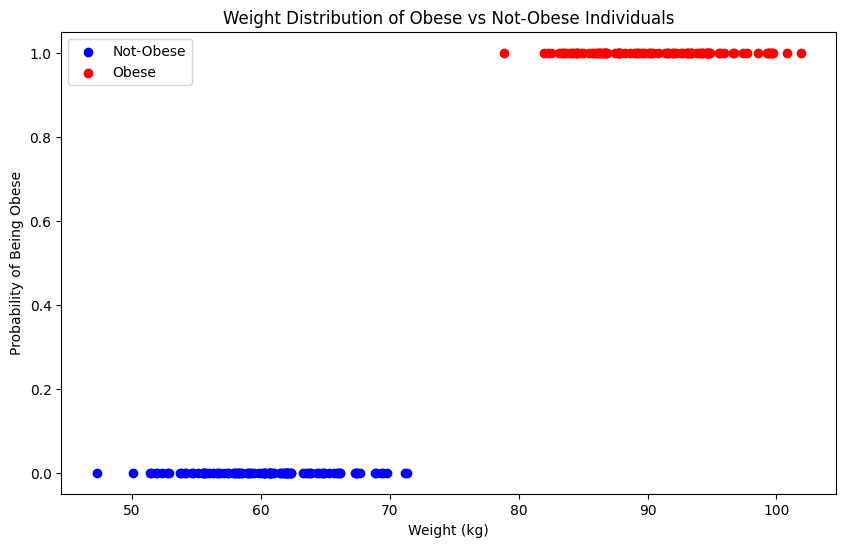

In [15]:


plt.figure(figsize=(10, 6))
plt.scatter(weight_not_obese, labels_not_obese, color='blue', label='Not-Obese')
plt.scatter(weight_obese, labels_obese, color='red', label='Obese')
plt.title('Weight Distribution of Obese vs Not-Obese Individuals')
plt.xlabel('Weight (kg)')
plt.ylabel('Probability of Being Obese')
plt.legend()
plt.show()


In [40]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(weights, labels, test_size=0.2, random_state=42, shuffle=True)

# The X_train and y_train will be used to train the logistic regression model
# The X_test and y_test will be used to evaluate the model's performance


In [49]:
# Now we will create our own logistic regression model 
# to classify a given weight as obese or not-obese

# Initialize m(parameters) and b(bias) to random values
m = np.random.uniform(-1, 1)
b = np.random.uniform(0, 1)

# The sigmoid function maps predictions to probabilities.

# z = m * x + b
# 'm' is the model's parameter, 'b' is the bias, and 'x' is the input feature(weights).

# The sigmoid function will transform 'z' to a value between 0 and 1.
Z = m * X_train + b
# Compute the sigmoid of the values Z manually
# The calculation 1 / (1 + np.exp(-Z)) is the sigmoid function
P = 1 / (1 + np.exp(-Z))  # probabilties
P

array([1.98987311e-09, 2.48274165e-14, 4.17059636e-09, 4.95184398e-11,
       5.96432092e-14, 1.30612970e-13, 1.88263845e-10, 9.08737065e-09,
       3.40021722e-14, 3.05726187e-10, 1.53420385e-13, 2.90694508e-13,
       1.11609489e-08, 2.02771544e-13, 1.27058423e-13, 1.71526417e-08,
       1.18114636e-12, 1.76831389e-09, 2.34845260e-14, 2.14741689e-09,
       5.78105357e-14, 1.11022097e-10, 1.16276754e-09, 6.13826558e-10,
       1.68355838e-09, 2.10575383e-14, 3.76668337e-08, 7.47385173e-15,
       4.28236637e-09, 3.74847963e-14, 1.14593385e-09, 4.48356714e-15,
       2.01227397e-14, 2.33630150e-08, 3.52118950e-14, 4.05102192e-15,
       2.02472758e-09, 6.07791119e-13, 4.23709087e-15, 2.16331252e-14,
       4.26865499e-10, 5.74094708e-09, 1.76747178e-08, 8.99240285e-14,
       6.28290677e-14, 9.24028430e-11, 3.92155153e-15, 2.80546954e-10,
       8.48270509e-13, 3.98173378e-09, 5.16557725e-10, 4.71275990e-14,
       9.29648430e-13, 5.95514322e-08, 1.93062679e-10, 4.09721543e-14,
      

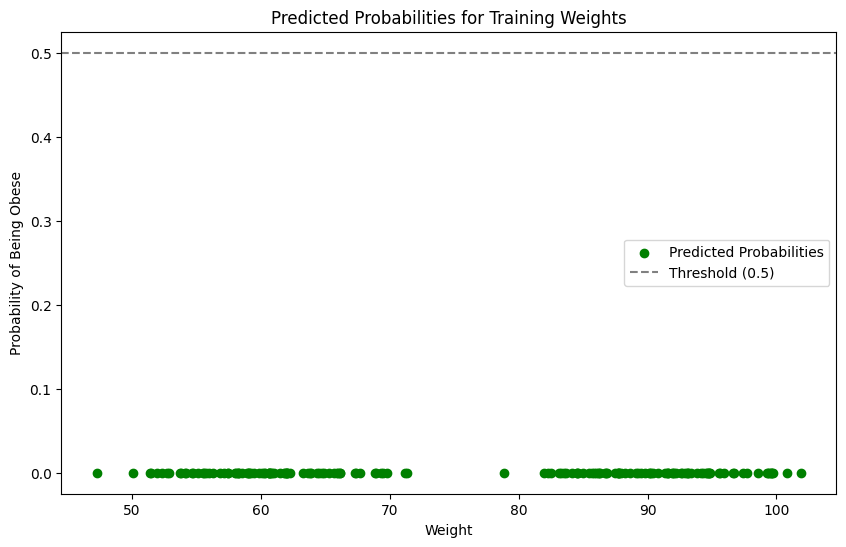

In [50]:
# Plot the predicted probabilities
plt.figure(figsize=(10, 6))
plt.scatter(X_train, P, color='green', label='Predicted Probabilities')
plt.axhline(y=0.5, color='gray', linestyle='--', label='Threshold (0.5)')
plt.xlabel('Weight')
plt.ylabel('Probability of Being Obese')
plt.legend()
plt.title('Predicted Probabilities for Training Weights')
plt.show()


In [21]:
m = np.random.uniform(-1, 1)
b = np.random.uniform(0, 1)
m,b

(-0.5183424401691064, 0.10029394226549782)

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data/obesity-classification.csv')  # Replace with your actual file path

# Select the 'Weight' column as your feature
X = df[['Weight']].values
# y = df['ObesityStatus'].values
df

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...,...
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight


In [4]:
# Map the labels to binary classes: obese and non-obese
df['Class'] = df['Class'].map({'Normal Weight': 0, 'Underweight': 0, 'Overweight': 1, 'Obese': 1})

# Select the feature (weight) and the target (class)
X = df['Weight'].values.reshape(-1, 1)  # Reshape for scikit-learn
y = df['Class'].values
X[:5], y[:5]

KeyError: 'Class'